# Data Source

Car Prices Dataset.

From: [kaggle.com](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

# Problem Definition

Predict the car price for a given variables in the dataset using machine learning.

Some variables may be modified to improve the prediction result.

# Libraries, Modules, and Configuration File

In [520]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

PATH = "/home/er_bim/Car-Price-Prediction/"
sys.path.append(PATH)
import src.util as utils
config = utils.load_config()

# Loading Dataset

In [521]:
# Loading datasets
df = pd.read_excel(config["data_train_original_path"])
df.tail(3)

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,40,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,40,Automatic,Front,04-May,Left wheel,Black,4
19236,470,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,40,Automatic,Front,04-May,Left wheel,White,12


# Data Definition

The variables definition are:
- Price			:	Car price, in US$ units.
- Manufacturer			:	Company name manufactured the car.
- Model			:	Entity name of the car model, define the manufacturer's product. 
- Prod. year		:	Year of car production.
- Category			:	Car type name, defined by its shape and function.
- Leather interior		:	The car's interior is covered by leather materials, yes or no. 
- Fuel type	:	The fuel type defined by the manufacturer to power the car's engine.
- Engine volume	:	 The total volume of all the cylinders in an engine, in liters (L) units.
- Mileage : The distance a car has traveled since it was first manufactured.
- Gear box type			:	Car transmission type.
- Drive wheels			: The car's drivetrain works with the engine to deliver power to the wheels.
- Doors		:	The number of doors in the car.
- Wheel		:	Side of car's drive position.
- Color		:	Dominant car's exterior color.
- Airbags		:	The number of airbags in the car.

**The target feature is "Price".**

# Basic Data Information

In [522]:
# check the basic information of the datasets
print(df.info())
print('#'*50)
# check the null values occurrence of the datasets
print(f"The null values in df are:\n{df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Manufacturer      19237 non-null  object
 2   Model             19237 non-null  object
 3   Prod. year        19237 non-null  int64 
 4   Category          19237 non-null  object
 5   Leather interior  19237 non-null  object
 6   Fuel type         19237 non-null  object
 7   Engine volume     19237 non-null  object
 8   Mileage           19237 non-null  object
 9   Cylinders         19237 non-null  int64 
 10  Gear box type     19237 non-null  object
 11  Drive wheels      19237 non-null  object
 12  Doors             19237 non-null  object
 13  Wheel             19237 non-null  object
 14  Color             19237 non-null  object
 15  Airbags           19237 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.3+ MB
None
#######

In [523]:
# checking duplicate data
print(f"There {df.duplicated().sum()} duplicate data in the dataset")


There 3512 duplicate data in the dataset


# General Data Modification

We will modify the dataset based on the data definition and basic data information above.

## Drop duplicates data

In [524]:
# drop duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

In [525]:
print(f"The dataset length after duplicates dropped is: {len(df)} rows")

The dataset length after duplicates dropped is: 15725 rows


## Modify data type

In [527]:
print(f"The data type of each column:\n\n{df.dtypes}")

The data type of each column:

Price                int64
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object


We found that some columns have the wrong data type i.e., `Engine volume`, `Mileage`, and `Doors`.

### `Engine volume`

In [528]:
# check the unique values
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [529]:
# make a new column refer to Turbo in the engine
df['Turbo'] = df['Engine volume'].apply(lambda x: 'Yes' if 'turbo' in str(x).lower() else 'No')

# delete the string 'Turbo' in the column value
df['Engine volume'] = df['Engine volume'].apply(lambda x: str(x).replace(' Turbo', ''))

# alter the data type into numeric
df['Engine volume'] = pd.to_numeric(df['Engine volume'])

Recheck the result after modification

In [530]:
print(f"The unique values in column 'Engine volume' are:\n{df['Engine volume'].unique()}\n\n")
print(f"The data type of column 'Engine volume' is: {df['Engine volume'].dtypes}\n\n")
print(f"The unique values in column 'Turbo' are:\n{df['Turbo'].unique()}\n\n")

The unique values in column 'Engine volume' are:
[ 3.5  3.   1.3  2.5  2.   1.8  2.4  4.   1.6  3.3  2.2  4.7  1.5  4.4
  1.4  3.6  2.3  5.5  2.8  3.2  3.8  4.6  1.2  5.   1.7  2.9  0.5  1.9
  2.7  4.8  5.3  0.4  1.1  2.1  0.7  5.4  3.7  1.   2.6  0.8  0.2  5.7
  6.7  6.2  3.4  6.3  4.3  4.2  0.  20.   0.3  5.9  5.6  6.   0.6  6.8
  4.5  7.3  0.1  3.1  6.4  3.9  0.9  5.2  5.8]


The data type of column 'Engine volume' is: float64


The unique values in column 'Turbo' are:
['No' 'Yes']




### `Mileage`

In [531]:
# check the unique values
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [532]:
# delete the string 'Turbo' in the column value
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace(' km', ''))

# alter the data type into numeric
df['Mileage'] = pd.to_numeric(df['Mileage'])

Recheck the result after modification

In [533]:
print(f"There are {df['Mileage'].nunique()} unique values in column 'Mileage'\n")
print(f"The unique values in column 'Mileage' are:\n{df['Mileage'].unique()}\n\n")
print(f"The data type of column 'Mileage' is: {df['Mileage'].dtypes}\n\n")

There are 7687 unique values in column 'Mileage'

The unique values in column 'Mileage' are:
[186005 192000 200000 ... 140607 307325 186923]


The data type of column 'Mileage' is: int64




### `Doors`

In [534]:
# check the unique values
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [535]:
# convert the data
df.replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

Recheck the result after modification

In [536]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

## Modify column names

In [537]:
print(f"The column names are:\n\n{df.columns.to_list()}")

The column names are:

['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo']


We will alter the column names into lower case, and the space characters into underscores.

In [538]:
# change column names to lower case
df.columns = df.columns.str.lower()

# replace the spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# delete the dot character
df.columns = df.columns.str.replace('.', '')

# change data value to lower case
df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)

Recheck the result after modification

In [539]:
print(f"The column names after modification are:\n\n{df.columns.to_list()}")

The column names after modification are:

['price', 'manufacturer', 'model', 'prod_year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags', 'turbo']


# Specific Data Modification

I will perform the further data modification on its column, but first we need to evaluate them to gain insights for further dataset adjustments.

In [540]:
# Create a list of DataFrames
cols = df.columns.to_list()

# Checking columns names in coffees group
for c in (cols):
    unique=df[c].unique()
    print(f"The unique values in column {c} are: \n{unique}\n")

The unique values in column price are: 
[13328 16621  8467 ... 56814 63886 22075]

The unique values in column manufacturer are: 
['Lexus' 'Chevrolet' 'Honda' 'Ford' 'Hyundai' 'Toyota' 'Mercedes-Benz'
 'Opel' 'Porsche' 'Bmw' 'Jeep' 'Volkswagen' 'Audi' 'Renault' 'Nissan'
 'Subaru' 'Daewoo' 'Kia' 'Mitsubishi' 'Ssangyong' 'Mazda' 'Gmc' 'Fiat'
 'Infiniti' 'Alfa Romeo' 'Suzuki' 'Acura' 'Lincoln' 'Vaz' 'Gaz' 'Citroen'
 'Land Rover' 'Mini' 'Dodge' 'Chrysler' 'Jaguar' 'Isuzu' 'Skoda'
 'Daihatsu' 'Buick' 'Tesla' 'Cadillac' 'Peugeot' 'Bentley' 'Volvo'
 'Áƒ¡Áƒ®Áƒ•Áƒ\x90' 'Haval' 'Hummer' 'Scion' 'Uaz' 'Mercury' 'Zaz' 'Rover'
 'Seat' 'Lancia' 'Moskvich' 'Maserati' 'Ferrari' 'Saab' 'Lamborghini'
 'Rolls-Royce' 'Pontiac' 'Saturn' 'Aston Martin' 'Greatwall']

The unique values in column model are: 
['Rx 450' 'Equinox' 'Fit' ... 'E 230 124' 'Rx 450 F Sport' 'Prius C Aqua']

The unique values in column prod_year are: 
[2010 2011 2006 2014 2016 2013 2007 1999 1997 2018 2008 2012 2017 2001
 1995 2009 200

## Column `price`

I will keep the data in this column as it is.

## Column `manufacturer`

There is one unrecognizable character in this column's unique value, so it will dropped first.

In [541]:
df = df.drop(df[df['manufacturer'] == 'Áƒ¡Áƒ®Áƒ•Áƒ\x90'].index)

Too many categorical value in this column, I will categorize them by the manufacturer country to narrow down the categorical value.

In [542]:
# define the manufacturer origin country
manufacturer_country_mapping = {
    'Toyota': 'Japan', 'Honda': 'Japan', 'Nissan': 'Japan', 'Mazda': 'Japan', 'Mitsubishi': 'Japan', 'Subaru': 'Japan',
    'Suzuki': 'Japan', 'Acura': 'Japan', 'Infiniti': 'Japan', 'Lexus': 'Japan', 'Scion': 'Japan', 'Isuzu': 'Japan',
    'Ford': 'USA', 'Chevrolet': 'USA', 'Chrysler': 'USA', 'Dodge': 'USA', 'Jeep': 'USA', 'GMC': 'USA','Cadillac': 'USA',
    'Buick': 'USA', 'Lincoln': 'USA', 'Tesla': 'USA', 'Hummer': 'USA', 'Mercury': 'USA', 'Saturn': 'USA', 'Pontiac': 'USA',
    'Bmw': 'Germany', 'Mercedes-Benz': 'Germany', 'Volkswagen': 'Germany', 'Audi': 'Germany', 'Porsche': 'Germany',
    'Opel': 'Germany',
    'Hyundai': 'South Korea', 'Kia': 'South Korea', 'Daewoo': 'South Korea', 'SsangYong': 'South Korea',
    'Jaguar': 'UK', 'Land Rover': 'UK', 'Bentley': 'UK', 'Rolls-Royce': 'UK', 'Aston Martin': 'UK', 'Mini': 'UK',
    'Fiat': 'Italy', 'Ferrari': 'Italy', 'Lamborghini': 'Italy', 'Alfa Romeo': 'Italy', 'Maserati': 'Italy',
    'Lancia': 'Italy', 'Pagani': 'Italy', 'Abarth': 'Italy',
    'Peugeot': 'France', 'Renault': 'France', 'Citroën': 'France', 'Bugatti': 'France',
    'Volvo': 'Sweden', 'Saab': 'Sweden', 'Koenigsegg': 'Sweden',
    'Moskvich': 'Russia', 'Vaz': 'Russia', 'Gaz': 'Russia', 'Uaz': 'Russia',
    'Greatwall': 'China', 'Haval': 'China',
    'Skoda': 'Czechia',
    'Seat': 'Spain',
    'Dacia': 'Romania',
    'Zaz': 'Ukraine',
    
}

In [543]:
# create the 'manufacturer_country' column
df['manufacturer_country'] = df['manufacturer'].map(manufacturer_country_mapping)

# check the new dataset after column addition
df.head(3)

,price,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo,manufacturer_country
0,13328,Lexus,Rx 450,2010,Jeep,Yes,Hybrid,3.5,186005,60,Automatic,4X4,4-5,Left Wheel,Silver,12,No,Japan
1,16621,Chevrolet,Equinox,2011,Jeep,No,Petrol,3.0,192000,60,Tiptronic,4X4,4-5,Left Wheel,Black,8,No,USA
2,8467,Honda,Fit,2006,Hatchback,No,Petrol,1.3,200000,40,Variator,Front,4-5,Right-Hand Drive,Black,2,No,Japan


In [544]:
print(f"The data length of column 'manufacturer' is {len(df['manufacturer'])} rows\n")
print(f"The data length of column 'manufacturer_country' is {len(df['manufacturer_country'])} rows")

The data length of column 'manufacturer' is 15723 rows

The data length of column 'manufacturer_country' is 15723 rows


All the data in the column `manufacturer` are succesfully mapped into column `manufacturer_country`, thus the column `manufacturer` can be dropped now.

In [545]:
# drop the column `manufacturer`
df.drop(['manufacturer'], axis=1, inplace=True)

In [546]:
# move the column `manufacturer_country` position in dataset
move_column = df.pop("manufacturer_country")
df.insert(1, "manufacturer_country", move_column)

## Column `model`

This column contain the specific car name, which was refer to the sub-entity of the column `manufacturer`, so this column is also will be dropped.

In [547]:
# drop the column `model`
df.drop(['model'], axis=1, inplace=True)

## Column `prod_year`

I will alter this column as the car's age, so the data will result from the difference between the production year, which is stated in the current data, and the recent year.

The recent year is determined from the year of this dataset published, which is 2021.

In [548]:
# create a new column 'age'
df['age'] = (2021 - df['prod_year'])

# move the column `age` position in dataset
move_column = df.pop("age")
df.insert(2, "age", move_column)

# drop the column `prod_year`
df.drop(['prod_year'], axis=1, inplace=True)

## Columns `category`, `leather_interior`, `fuel_type`, and `engine_volume`

I will keep the data in these columns as it is.

## Column `cylinders`

In [549]:
print(f"The unique values in column 'cylinders' are:\n\n{sorted(df['cylinders'].unique())}")

The unique values in column 'cylinders' are:

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160]


Those values are not refer to the number of cylinders in car's engine, so I decide to drop this column.

In [550]:
# drop the column `cylinders`
df.drop(['cylinders'], axis=1, inplace=True)

## Column `mileage`

I will move this column's position nect to the column `age`.

In [551]:
# move the column `mileage` position in dataset
move_column = df.pop("mileage")
df.insert(3, "mileage", move_column)

## Columns `gear_box_type`, `drive_wheels`, and `doors`

I will keep the data in these columns as it is.

## Column `wheel`

This column is refer to the car's steering side, so I will alter both of the column name and its value.

In [552]:
print(f"The unique values in column 'wheel' are:\n\n{df['wheel'].unique()}")

The unique values in column 'wheel' are:

['Left Wheel' 'Right-Hand Drive']


In [553]:
# create a new column `steering_side`
alteration_map = {'Left Wheel': 'Left', 'Right-Hand Drive': 'Right'}
df['steering_side'] = df['wheel'].map(alteration_map)

# drop the column `wheel`
df.drop(['wheel'], axis=1, inplace=True)

# move the column `steering_side` position in dataset
move_column = df.pop("steering_side")
df.insert(10, "steering_side", move_column)

## Column `color`

The unique values variations are too wide, so I decide to drop this column to compacting the predictors.

In [554]:
# drop the column `color`
df.drop(['color'], axis=1, inplace=True)

## Columns `doors`, and `airbags`

I will keep the data in these columns as it is.

## Column `turbo`

I will move this column's position next to column `engine_volume`.

In [555]:
# move the column `turbo` position in dataset
move_column = df.pop("turbo")
df.insert(8, "turbo", move_column)

In [556]:
df

,price,manufacturer_country,age,mileage,category,leather_interior,fuel_type,engine_volume,turbo,gear_box_type,drive_wheels,steering_side,doors,airbags
0,13328,Japan,11,186005,Jeep,Yes,Hybrid,3.5,No,Automatic,4X4,Left,4-5,12
1,16621,USA,10,192000,Jeep,No,Petrol,3.0,No,Tiptronic,4X4,Left,4-5,8
2,8467,Japan,15,200000,Hatchback,No,Petrol,1.3,No,Variator,Front,Right,4-5,2
3,3607,USA,10,168966,Jeep,Yes,Hybrid,2.5,No,Automatic,4X4,Left,4-5,0
4,11726,Japan,7,91901,Hatchback,Yes,Petrol,1.3,No,Automatic,Front,Left,4-5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15720,470,Japan,10,307325,Hatchback,Yes,Hybrid,1.8,No,Automatic,Front,Left,4-5,12
15721,8467,Germany,22,300000,Coupe,Yes,Cng,2.0,Yes,Manual,Rear,Left,2-3,5
15722,15681,South Korea,10,161600,Sedan,Yes,Petrol,2.4,No,Tiptronic,Front,Left,4-5,8
15723,26108,South Korea,11,116365,Jeep,Yes,Diesel,2.0,No,Automatic,Front,Left,4-5,4


# Data Distribution Evaluation and Outlier Detection

We need to separate the dataset into categorical and numeric columns.

In [557]:
# create a list of categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# create a list of categorical columns
num_cols = df.select_dtypes(include=np.number).columns.to_list()

## Categorical columns

Check the data distribution of categorical columns using histrogram plot and table.

In [558]:
print(f"The statistical summary of categorical columns are:\n\n{df[cat_cols].describe()}")

The statistical summary of categorical columns are:

       manufacturer_country category leather_interior fuel_type  turbo  \
count                 15270    15723            15723     15723  15723   
unique                   13       11                2         7      2   
top                   Japan    Sedan              Yes    Petrol     No   
freq                   5537     7010            10557      8823  13835   

       gear_box_type drive_wheels steering_side  doors  
count          15723        15723         15723  15723  
unique             4            3             2      3  
top        Automatic        Front          Left    4-5  
freq           10088        10990         14291  14853  


In [559]:
def check_distribution(col):
    """A function to visualize the data distribution for each categorical column.
    The result will show as histrogram plot and table.
    """
    # Histogram
    plt.figure(figsize=(9, 5))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f"Distribution of {str(col).upper()}")
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.ylabel('Frequency')
      
    # Show the plot
    plt.show()
    
    # Create distribution table
    incentive_counts = df[col].value_counts().reset_index()
    
    total_counts = df[col].value_counts().sum()
    incentive_counts['percentage'] = (incentive_counts['count'] / total_counts) * 100

    incentive_counts.columns = [col, 'count', 'percentage']
    incentive_counts.sort_values(by='percentage')
    
    print(incentive_counts)
    print("="*105)
    print("="*105)

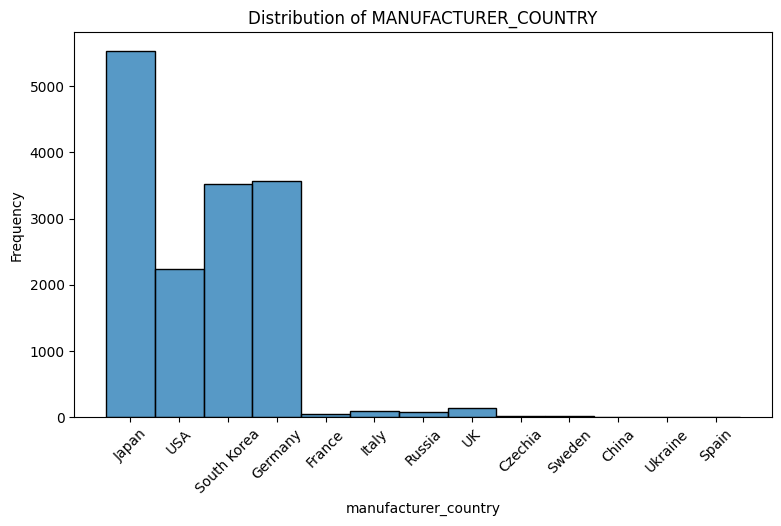

   manufacturer_country  count  percentage
0                 Japan   5537   36.260642
1               Germany   3573   23.398821
2           South Korea   3521   23.058284
3                   USA   2234   14.629993
4                    UK    142    0.929928
5                 Italy     88    0.576293
6                Russia     75    0.491159
7                France     53    0.347086
8                Sweden     21    0.137525
9               Czechia     20    0.130976
10                China      2    0.013098
11              Ukraine      2    0.013098
12                Spain      2    0.013098


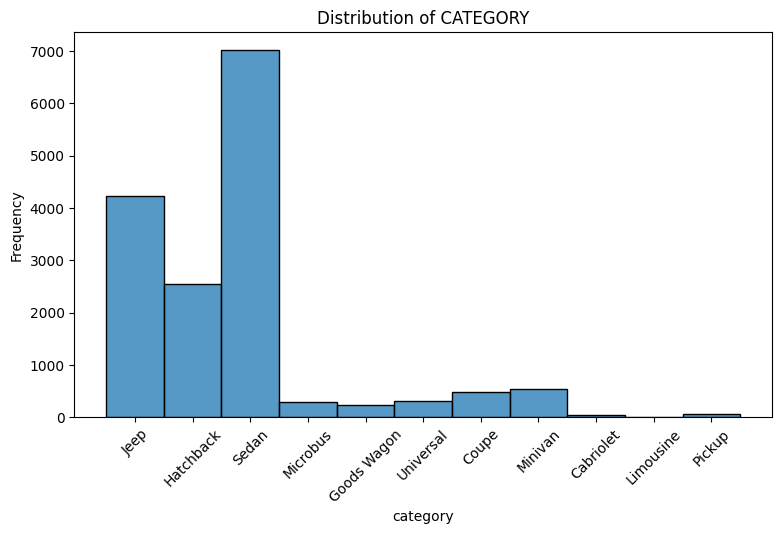

       category  count  percentage
0         Sedan   7010   44.584367
1          Jeep   4224   26.865102
2     Hatchback   2548   16.205559
3       Minivan    534    3.396298
4         Coupe    476    3.027412
5     Universal    311    1.977994
6      Microbus    294    1.869872
7   Goods Wagon    229    1.456465
8        Pickup     51    0.324366
9     Cabriolet     35    0.222604
10    Limousine     11    0.069961


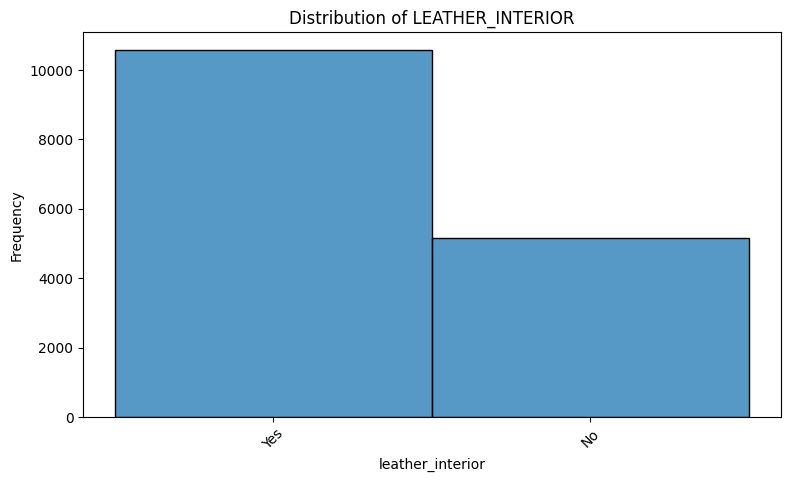

  leather_interior  count  percentage
0              Yes  10557   67.143675
1               No   5166   32.856325


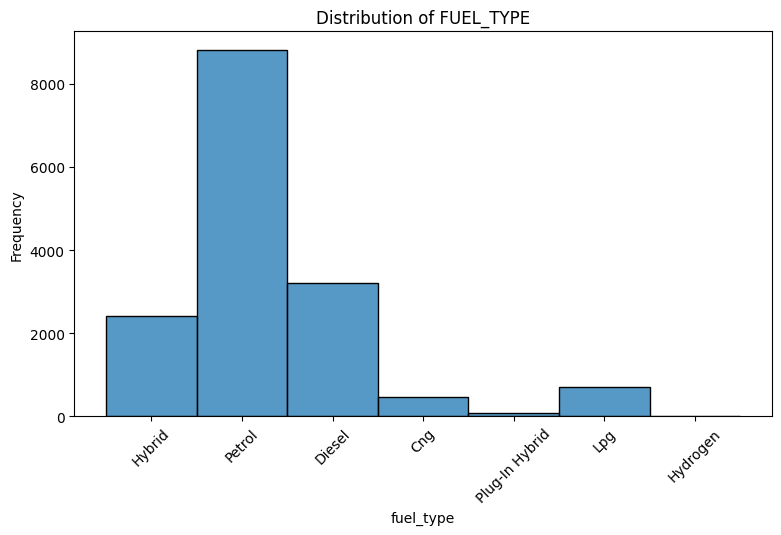

        fuel_type  count  percentage
0          Petrol   8823   56.115245
1          Diesel   3208   20.403231
2          Hybrid   2424   15.416905
3             Lpg    714    4.541118
4             Cng    468    2.976531
5  Plug-In Hybrid     85    0.540609
6        Hydrogen      1    0.006360


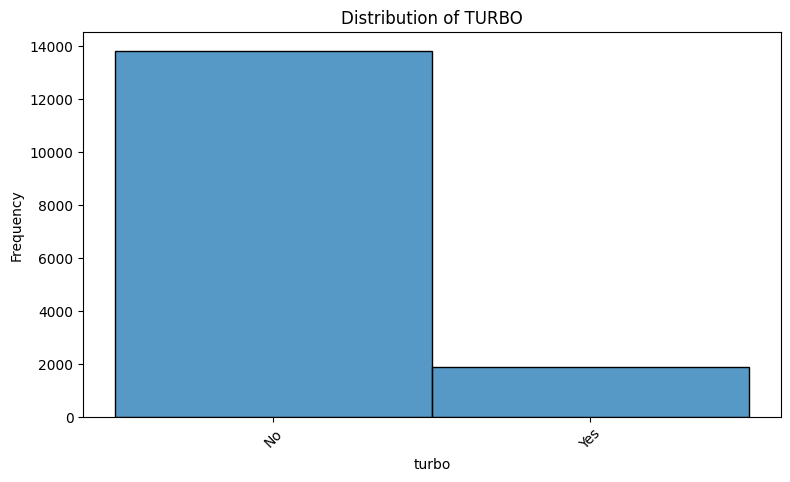

  turbo  count  percentage
0    No  13835   87.992113
1   Yes   1888   12.007887


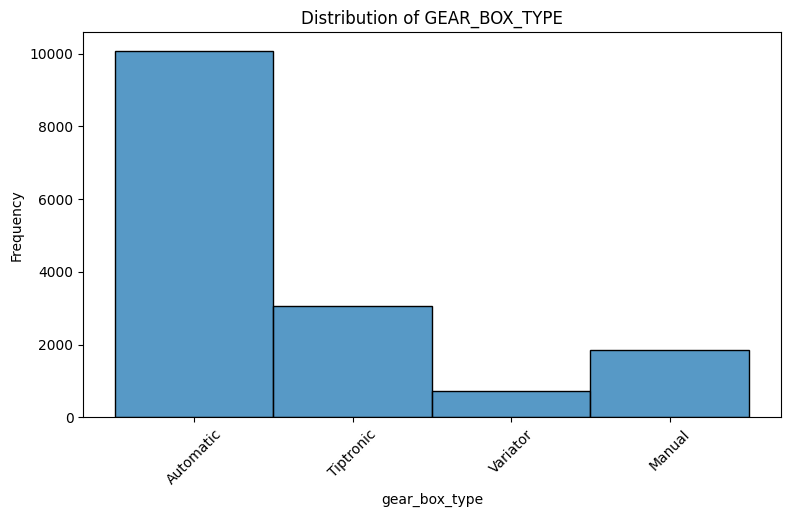

  gear_box_type  count  percentage
0     Automatic  10088   64.160784
1     Tiptronic   3064   19.487375
2        Manual   1839   11.696241
3      Variator    732    4.655600


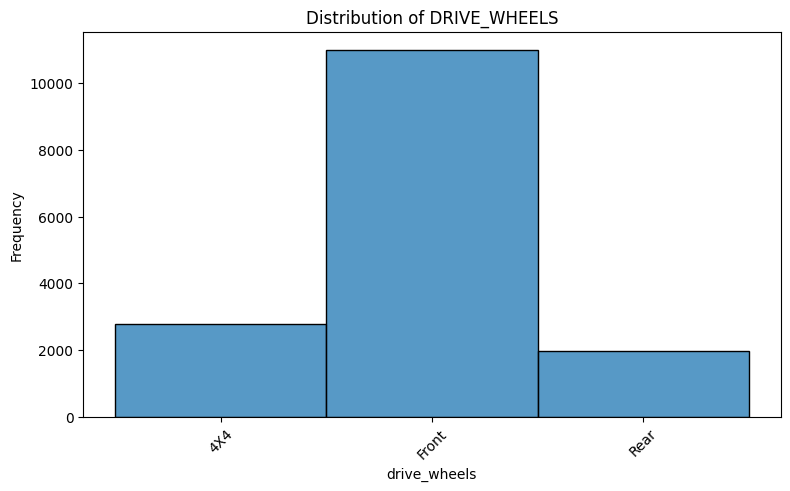

  drive_wheels  count  percentage
0        Front  10990   69.897602
1          4X4   2766   17.592063
2         Rear   1967   12.510335


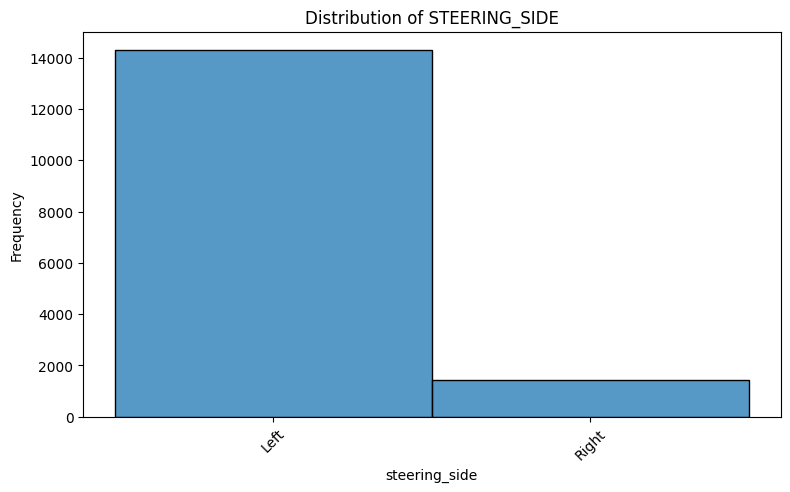

  steering_side  count  percentage
0          Left  14291   90.892323
1         Right   1432    9.107677


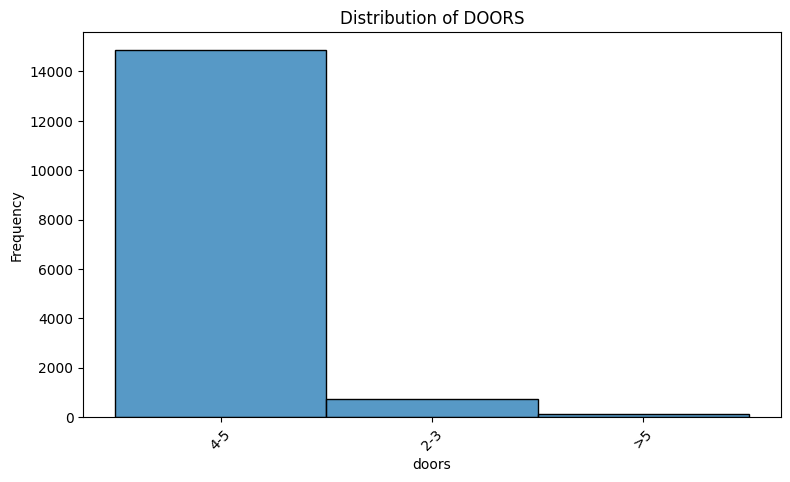

  doors  count  percentage
0   4-5  14853   94.466705
1   2-3    746    4.744642
2    >5    124    0.788654


In [560]:
# plot the graphs for each categorical column
for c in cat_cols:
    check_distribution(c)

## Numeric columns

Check the data distribution of numeric columns using histrogram plot and table.

The oultier detection using boxplot.

In [561]:
def check_outlier(col):
    """A function to visualize the data distribution for each numerical column.
    The histogram informs the data distribution, and the boxplot gives the detailed data on the outliers.
    """
    # Create a figure with two subplots
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, ax=ax_hist)
    ax_hist.set_title(f"Distribution of {str(col).upper()}")
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[col], ax=ax_box)
    ax_box.set_xlabel(col)
    ax_box.set_title(f"Boxplot of {str(col).upper()}")

    # Show the plot
    plt.tight_layout()
    plt.show()

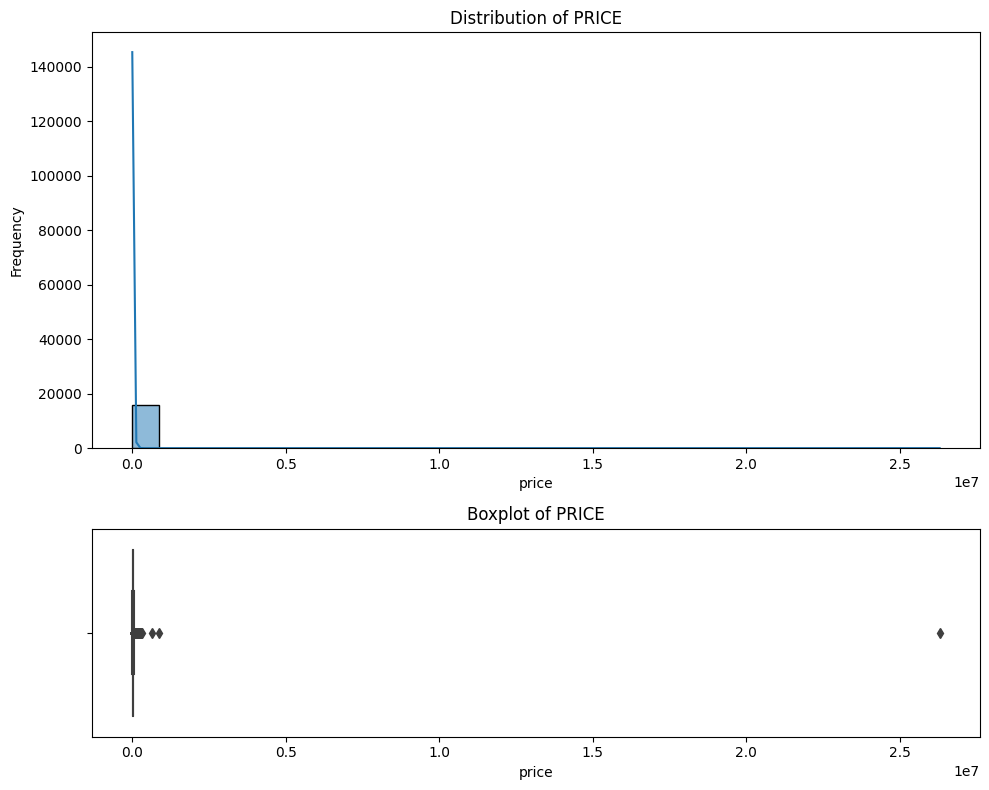

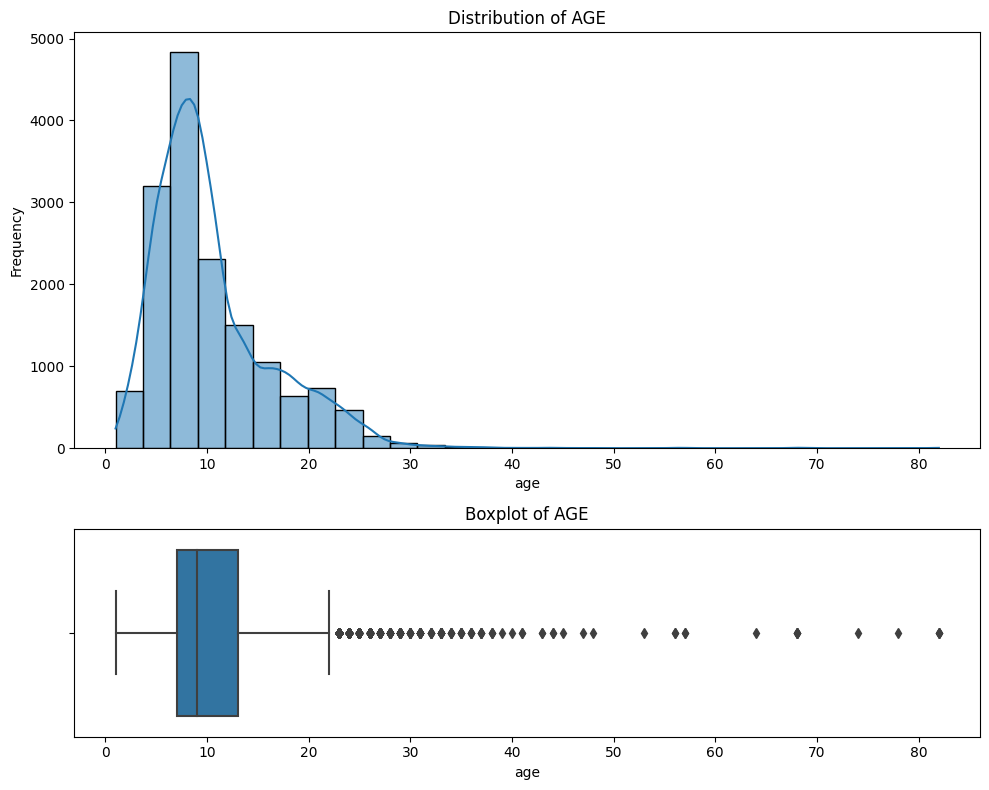

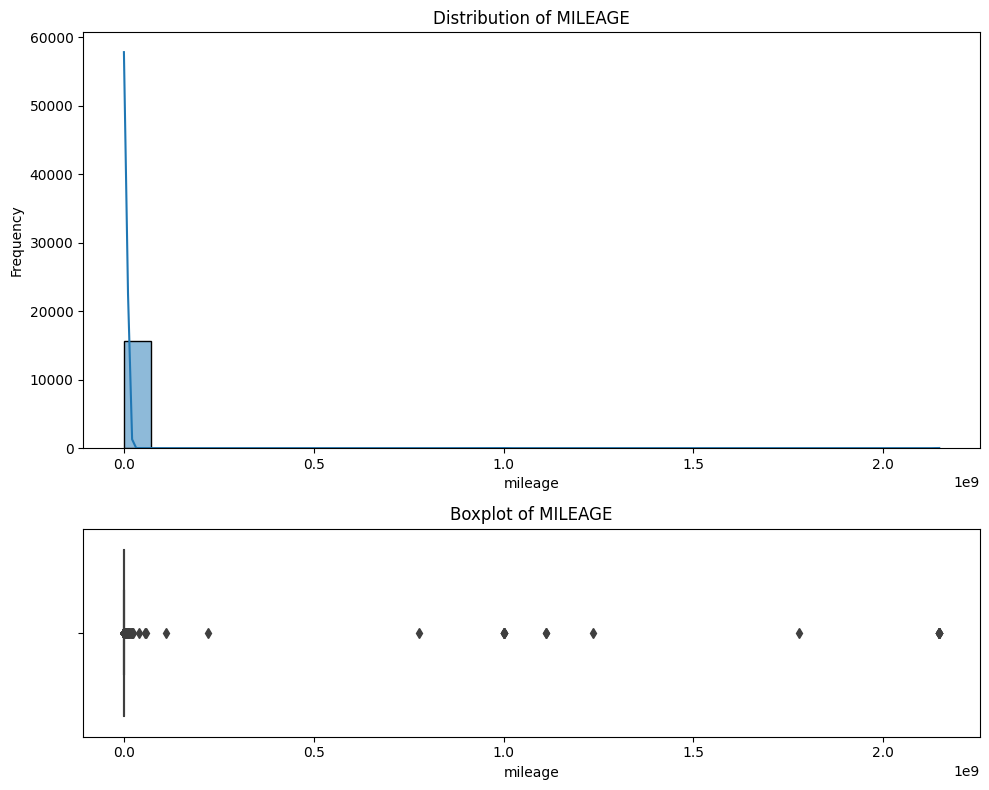

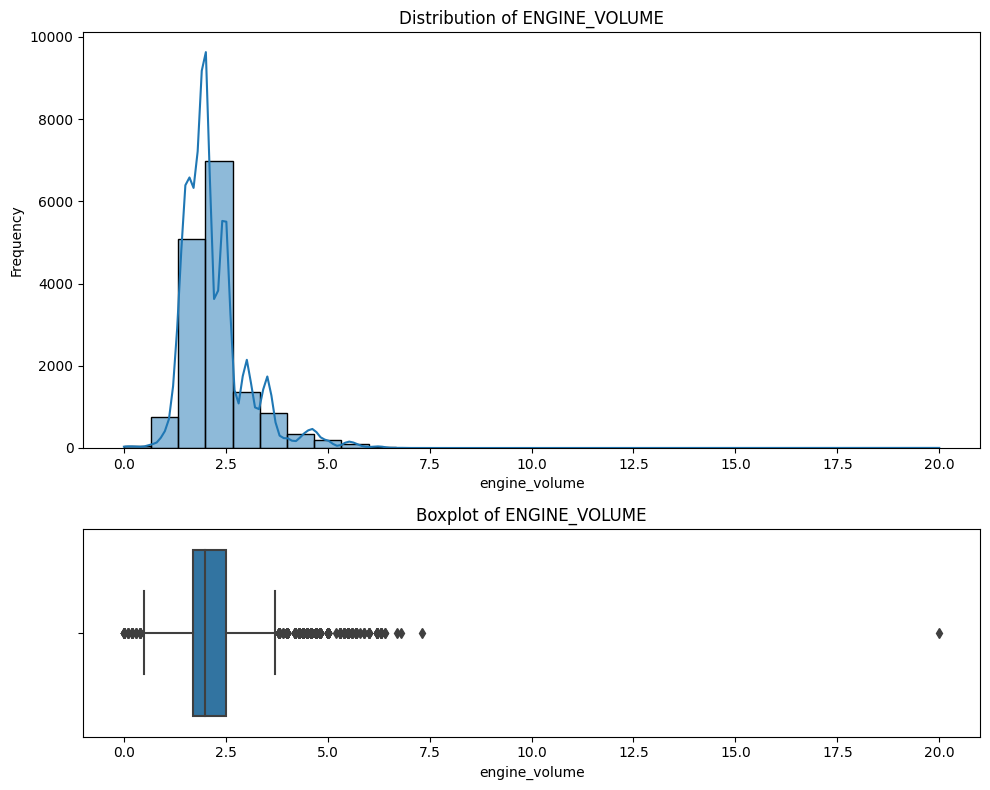

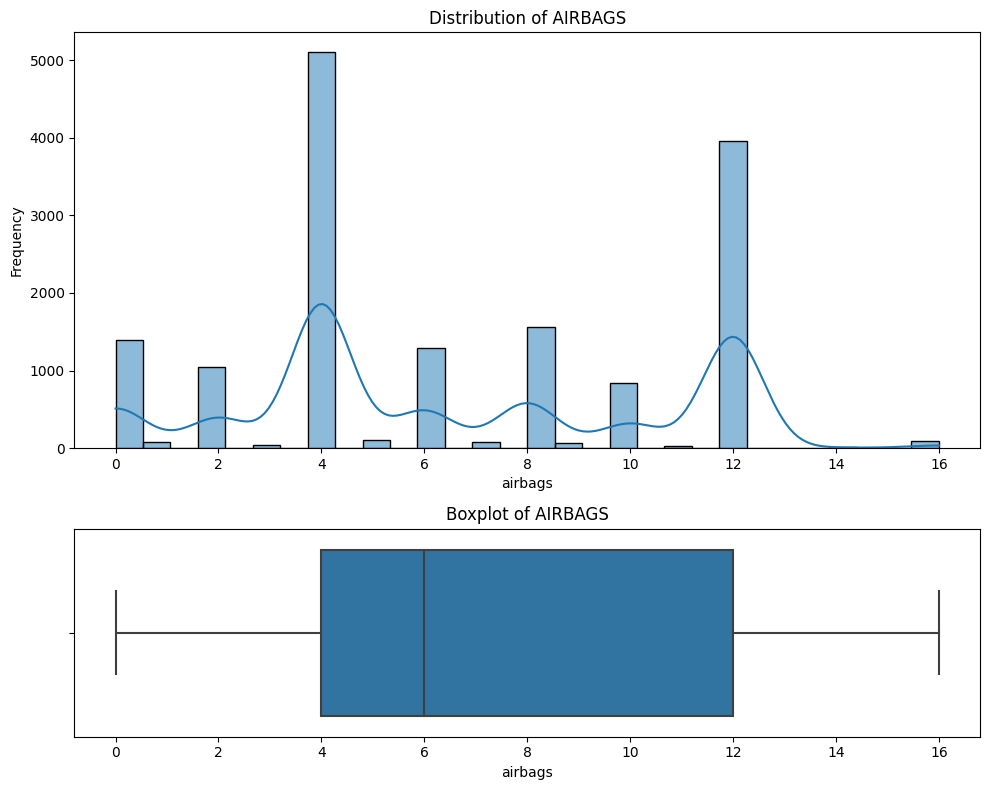

In [562]:
# plot the graphs for each numerical column
for c in num_cols:
    check_outlier(c)

In [563]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Due to the high variance in some columns, the exact number of outlier threshold cannot clearly be determined from the plots above. 

We need to check them with more detailed information.

,label,lower_whisker,median,upper_whisker
0,price,1.0,14166.0,47107.0
1,age,1.0,9.0,22.0
2,mileage,0.0,121000.0,350070.0
3,engine_volume,0.5,2.0,3.7
4,airbags,0.0,6.0,16.0


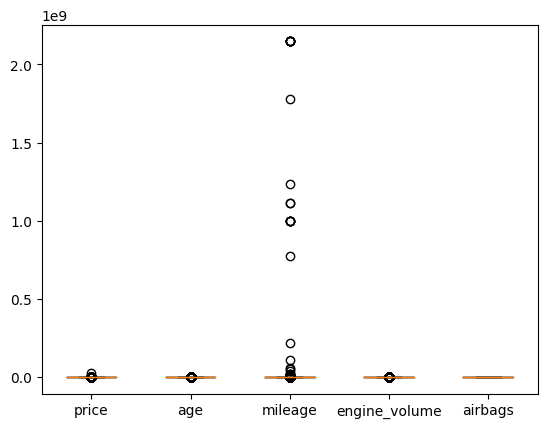

In [564]:
labels = num_cols
bp = plt.boxplot(df[num_cols], labels=labels)
get_box_plot_data(labels, bp)

In [565]:
df[num_cols].describe()

,price,age,mileage,engine_volume,airbags
count,1.572300e+04,15723.000000,1.572300e+04,15723.000000,15723.000000
mean,2.027982e+04,10.480506,1.836627e+06,2.212809,6.543980
std,2.106524e+05,6.012278,5.353588e+07,0.806238,4.067585
min,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000
25%,7.527000e+03,7.000000,6.656650e+04,1.700000,4.000000
50%,1.416600e+04,9.000000,1.210000e+05,2.000000,6.000000
75%,2.336400e+04,13.000000,1.800000e+05,2.500000,12.000000
max,2.630750e+07,82.000000,2.147484e+09,20.000000,16.000000


### Outlier handling in column `price`

Based on the statistical summary, the minimum price is US$ 1, which does not make sense in my opinion.

So I set the low threshold for the column `price` at US$ 1,000.

In [566]:
# create the instance of drop data
drop_price = df[(df['price'] < 1000) | (df['price'] > 47107)]

# execute the outlier removal
df = df.drop(drop_price.index)

### Outlier handling in column `age`

The data valued more than 22 are considered as outlier.

In [567]:
# create the instance of drop data
drop_age = df[(df['age'] > 22)]

# execute the outlier removal
df = df.drop(drop_age.index)

### Outlier handling in column `mileage`

The data valued more than 350,000 are considered as outlier.

We found in the statistical summary that the minimum value is 0 (zero), which is does not make sense in terms of used car. So I decided to set the minimum threshold for the column `mileage` at 10,000 km.

In [568]:
# create the instance of drop data
drop_mileage = df[(df['mileage'] < 10000) | (df['mileage'] > 350000)]

# execute the outlier removal
df = df.drop(drop_mileage.index)

### Outlier handling in column `engine_volume`

The data valued less than 0.5 and more than 3.7 are considered as outlier.

In [569]:
# create the instance of drop data
drop_engine = df[(df['engine_volume'] < 0.5) | (df['engine_volume'] > 3.7)]

# execute the outlier removal
df = df.drop(drop_engine.index)

# Checking Multicollinearity

In [570]:
corr = df.corr(numeric_only=True).round(3)
corr.style.background_gradient(cmap='coolwarm')

,price,age,mileage,engine_volume,airbags
price,1.000000,-0.415000,-0.228000,0.143000,-0.025000
age,-0.415000,1.000000,0.427000,0.110000,-0.208000
mileage,-0.228000,0.427000,1.000000,0.171000,-0.073000
engine_volume,0.143000,0.110000,0.171000,1.000000,0.249000
airbags,-0.025000,-0.208000,-0.073000,0.249000,1.000000


In [571]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [572]:
# run the VIF calculation on df, with column 'price' as target
y, X = dmatrices('price ~ age+mileage+engine_volume+airbags', data=df, return_type='dataframe')

# create the report tabel
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF,features
0,19.781201,Intercept
1,1.284597,age
2,1.247661,mileage
3,1.119587,engine_volume
4,1.134200,airbags


The correlation value in the matrix shown above is maximum at 0.427, while the VIF value of each numeric column indicates that there is no muliticollineartity between the numeric columns.

# Save the Cleaned Dataset

The dataset examination is completed, the data is clean and ready to be trained. 

In [576]:
# save the dataset
df.to_csv(PATH + 'data/processed/CarPrice_clean.csv', index=False)